In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import f1_score, classification_report, recall_score, precision_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [37]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('Churn_Modelling.csv.xls')

In [5]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [12]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

> ## A. EDA

In [13]:
# Tidak ada data null pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


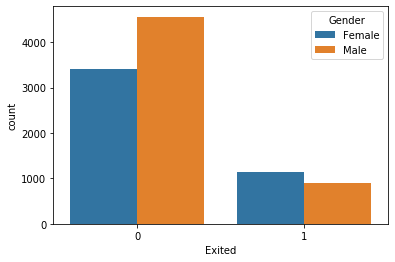

In [3]:
# Jumlah nasabah yang menutup akun jauh lebih sedikit daripada yang tidak menutup akun. Dan mayoritas nasabah yang tidak menutup akun adalah nasabah pria sedangkan yang menutup akun lebih banyak wanita, walaupun perbandingan antara pria dan wanita pada nasabah yang menutup akun tidak terlalu signifikan atau jumlahlah tidak berbeda jauh.
sns.countplot(x='Exited', data=df, hue='Gender')

In [7]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

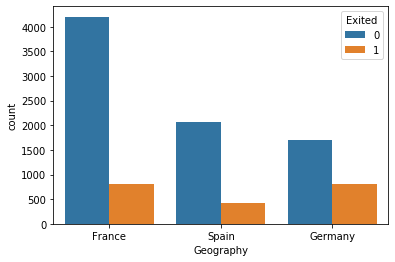

In [19]:
# Jumlah nasabah terbanyak berada di France, diikuti oleh Germany dan Spain. Mayoritas nasabah di semua negara tidak menutup akun. Namun perbandingan paling besar berada di France dengan mayoritas besar nasabah tidak menutup akun. Sedangkan Nasabah di Germany walaupun memiliki jumlah nasabah yang hampir sama dengan Spain, memiliki perbandingan hampir 50:50 antara yang menutup dan tidak menutup akun.
sns.countplot(x='Geography', data=df, hue='Exited')

In [21]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

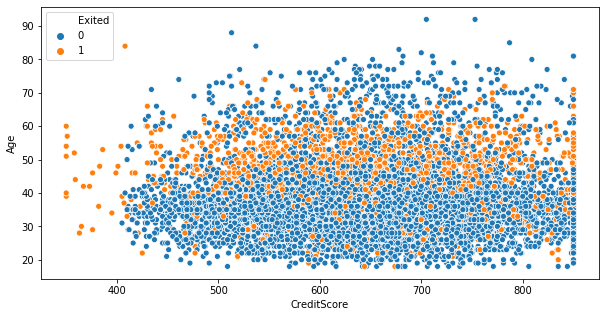

In [29]:
# Dari informasi scatterplot dan barplot dibawah dapat disimpulkan bahwa mayoritas nasabah yang menutup akun berada diumur 45-60. Sedangkan CreditScore tidak terlalu berpengaruh pada keputusan nasabah untuk menutup akun karena seperti yang ditunjukkan oleh visualisasi, nasabah yang menutup akun tersebar luas dari CreditScore yang paling rendah sampai yang paling tinggi.
plt.figure(figsize=(10,5))
sns.scatterplot(x="CreditScore", y="Age", data=df, hue='Exited')

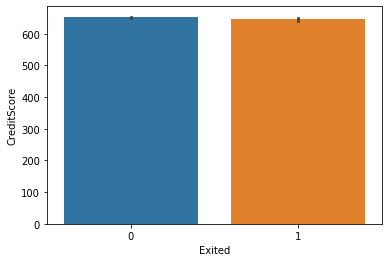

In [33]:
sns.barplot(y='CreditScore', x='Exited', data=df)

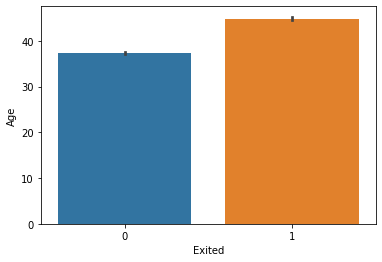

In [34]:
sns.barplot(y='Age', x='Exited', data=df)

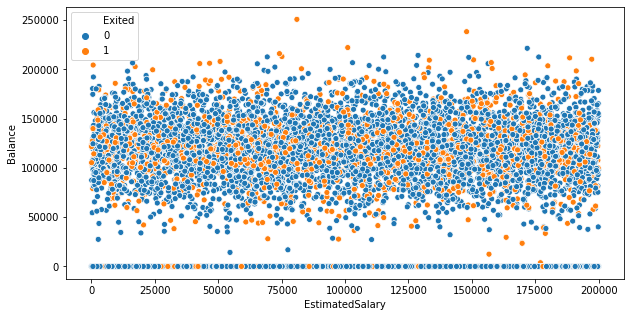

In [4]:
# Dari visualisasi dibawah dapat disimpulkan bahwa jumlah EstimatedSalary dan Balance juga tidak berpengaruh kepada keputusan nasabah akan menutup akun atau tidak.
plt.figure(figsize=(10,5))
sns.scatterplot(x="EstimatedSalary", y="Balance", hue="Exited", data=df)

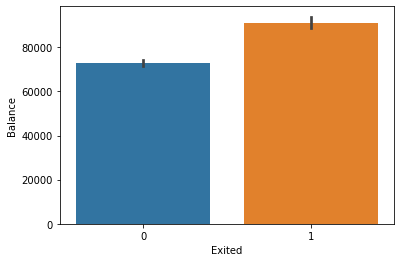

In [37]:
sns.barplot(y='Balance', x='Exited', data=df)

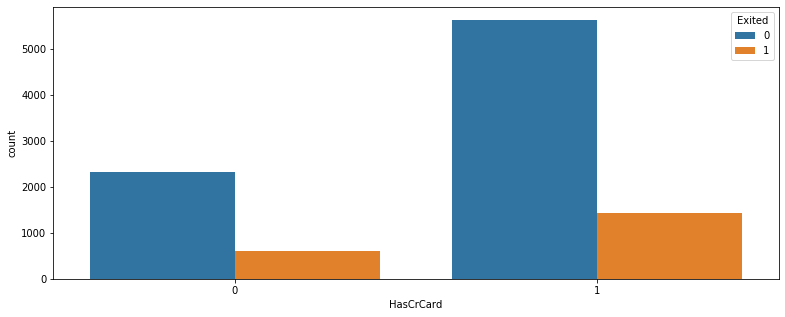

In [9]:
plt.figure(figsize=(13,5))
sns.countplot(x='HasCrCard', hue='Exited', data=df)

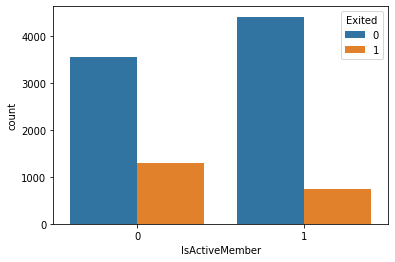

In [10]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

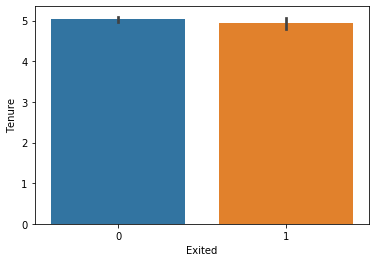

In [8]:
# Lama tahun nasabah telah menggunakan bank juga tidak berpengaruh pada keputusan penutupan akun.
sns.barplot(y='Tenure', x='Exited', data=df)

### Saran untuk Bank:
> * Memerhatikan nasabah yang datang dari Germany karena persentasi penutupan akun hampir 50:50
> * Untuk tidak terlalu memperhatikan CreditScore, EstimatedSalary, Tenure dan Balance karena memiliki hubungan yang tidak kuat pada keputusan nasabah untuk menutup akun.
> * Memperhatikan nasabah diumur 45-60 karena mayoritas yang menutup akun berada pada range umur tsb.
> * Nasabah yang memiliki CreditCard dan merupakan member aktif akan condong ke tidak menutup akun.

> ## B. Data Cleaning & Preprocessing

In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
# Memilih fitur yang akan digunakan pada model. X sebagai fitur untuk semua kolom kecuali RowNumber, CustID, Surname dan Exited.
# y sebagai target yaitu kolom Exited
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

In [16]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [19]:
# Encoding data non-numerik menggunakan OneHotEncoder dan kemudian melakukan Column Transform pada kolom yang dituju. Untuk kolom yang tidak di encode dibiarkan saja menggunakan passthrough
transformer= ColumnTransformer([('one_hot',OneHotEncoder(drop='first'),['Geography', 'Gender']),
], remainder='passthrough')

In [20]:
#Splitting data untuk digunakan pada model
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.2,
    stratify=y,
    random_state=2020)

In [27]:
X_train

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8670          705    France  Female   55       8       0.00              2   
9372          677    France    Male   30       1   78133.15              1   
6033          612     Spain  Female   36       5  119799.27              2   
1082          688     Spain    Male   36       0   89772.30              1   
4778          737     Spain  Female   45       2       0.00              2   
...           ...       ...     ...  ...     ...        ...            ...   
2888          795   Germany    Male   37       2  139265.63              2   
6719          650    France  Female   39       4       0.00              2   
2408          653     Spain    Male   55       7       0.00              2   
2418          614    France    Male   40       6       0.00              1   
6284          596    France    Male   33       8       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
8670          1               1         14392.68  
9372          0               1        174225.88  
6033          1               0        159416.58  
1082          1               0        177383.68  
4778          0               1        177695.67  
...         ...             ...              ...  
2888          1               1        198745.94  
6719          0               0        186275.70  
2408          1               1         41967.03  
2418          1               1         20339.79  
6284          1               0        121189.30  

[8000 rows x 10 columns]

> ## C. Model Benchmark & Evaluation Metric

In [33]:
# Menggunakan Performance Metrics Recall karena kita ingin mengetahui jika kita memiliki prediksi nasabah tidak akan menutup akun ternyata aktualisasinya nasabah menutup akun.
def evaluate(df,model):

    model_name=[]
    recall_score=[]
    recall_std=[]
    for name, model in model:
        model = model
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,X_train,y_train,scoring='recall',cv=skfold).mean()
        std= cross_val_score(estimator,X_train,y_train,scoring='recall',cv=skfold).std()
        recall_score.append(score)
        recall_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'recall_score':recall_score, 'recall_std':recall_std})

In [29]:
models = [
    ['Log Regression', LogisticRegression()],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier(n_neighbors = 2)]]

In [34]:
# Bercasarkan evaluasi, Decision tree memiliki tingkat akurasi tertinggi. Maka kita gunakan Decision tree.
evaluate(df,models)

Name  recall_score  recall_std
0  Log Regression      0.056442    0.014466
1    DecisionTree      0.523313    0.022906
2    RandomForest      0.462577    0.022988
3     KNeighbours      0.047239    0.010555

In [39]:
# Melakukan pengecekan benchmark performance pada test data
model=DecisionTreeClassifier()

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)])

estimator.fit(X_train,y_train)
recall_score(y_test,estimator.predict(X_test))

0.4864864864864865

> ## D. Model Improvement dan Hyper-parameter Tuning

In [41]:
# Karena dataset termasuk tidak stabil atau imbalance, maka digunakan algoritma sampling NearMiss() untuk memberi kestabilan antar data dengan melakukan undersampling.
# Digunakan juga algoritma sampling SMOTE yang memiliki fungsi yang sama yaitu memberi kestabilan pada fata imbalance.
model=DecisionTreeClassifier()
under=NearMiss()
over=SMOTE()

estimator = Pipeline([
    ('preprocess', transformer), ('balance', under),
    ('model', model)])

skfold=StratifiedKFold(n_splits=5)

In [42]:
# Balancing hyperparameter menggunakan nearmiss dan smote
hyperparam_space={'balance':[over,under]}

In [43]:
# Menggunakan GridSearchCV untuk mengetahui value optimal pada model secara cepat
grid_search= GridSearchCV(estimator,
    param_grid= hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    scoring='recall')

In [44]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('balance', NearMiss()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1, param_grid={'balance': [SMOTE(), NearMiss()]},
             scoring='recall')

In [45]:
# Dengan GridSearchCV didapat score terbaik yaiut 0.9 yang merupakan peningkatan 0.3 dari default model sblm hyperparameter
grid_search.best_score_

0.9

In [46]:
# Didapat jg bahwa algoritma sampling untuk balancing data imbalance yang paling tepat adalah NearMiss
grid_search.best_params_

{'balance': NearMiss()}

In [47]:
# Recall score setelah hyperparameter juga meningkat jauh hampir 0.4 poin
grid_search.best_estimator_.fit(X_train,y_train)
recall_score(y_test,grid_search.best_estimator_.predict(X_test))

0.8894348894348895

In [48]:
print(classification_report(y_test,grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.33      0.48      1593
           1       0.25      0.89      0.39       407

    accuracy                           0.44      2000
   macro avg       0.59      0.61      0.44      2000
weighted avg       0.78      0.44      0.47      2000



In [49]:
hyperparam_space = {
        'balance__n_neighbors': [2, 5, 10, 15, 20],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}

In [ ]:
# Min sample leaf untuk menentukanminumun sample pada noda leaf
# Min sample split unutk menentukan sample min yang dibutuhkan pada internal noda untuk dilakukan splitting
# Max depth adalah untuk menentukan maksimal kedalaman dari tree
# Model criterion untuk mencegah data homogen

# Semua hyperparameter digunakan untuk menghindari overfitting dan jumlah yang digunakan secara random

In [50]:
estimator = Pipeline([
    ('preprocess', transformer), ('balance', under),
    ('model', model)])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='recall',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('balance', NearMiss()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'balance__n_neighbors': [2, 5, 10, 15, 20],
                         'model__criterion': ['entropy', 'gini'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7],
                         'model__min_samples_leaf': [1, 

In [51]:
grid.best_estimator_.fit(X_train,y_train)
recall_score(y_test,grid_search.best_estimator_.predict(X_test))

0.8894348894348895

In [52]:
# Report dari klasifikasi menunjukkan bahwa hasil recall score naik menjadi 0.90 setelah melakukan tuning
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.36      0.52      1593
           1       0.26      0.90      0.41       407

    accuracy                           0.47      2000
   macro avg       0.60      0.63      0.46      2000
weighted avg       0.80      0.47      0.50      2000



In [53]:
# Parameter terbaik berdasarkan GridSearchCV adalah seperti berikut.
grid.best_params_

{'balance__n_neighbors': 15,
 'model__criterion': 'entropy',
 'model__max_depth': 7,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 50}

## Kesimpulan
* Metric Evaluasi yang paling tepat digunakan untuk mengetahui apakah nasabah akan menutup akun apa tidak adalah Recall Score. Karena kita ingin dengan tepat memprediksi apakah nasabah yang tidak ingin menutup akun ternyata realitanya memutuskan untuk menutup akun bank. Hal ini merupakan kerugian terbesar dan paling penting dibanding prediksi dan aktualisasi lainnya.
* Hyperparameter tuning meningkatkan akurasi dari model machine learning secara signifikan.
* Model Machine Learning yang akan digunakan adalah Decision Tree Classifier karena memiliki recall score tertinggi dan standard deviasi yang relatif rendah dibanding model lainnya. Kemudian lakukan Hyperparameter tuning untuk mengatasi masalah data imbalance karena dataset yang diterima tidak stabil terutama pada data yang ingin diprediksi.